In [5]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.3 MB 1.1 MB/s eta 0:00:02
   --------------------- ------------------ 0.7/1.3 MB 5.1 MB/s eta 0:00:01
   ------------------------------- -------- 1.1/1.3 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 6.0 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 6.0 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 6.0 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 6.0 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 2.9 MB/s eta 0:00:00


Training ExtraTrees with StandardScaler...
Training DecisionTree with StandardScaler...
Training SVM with StandardScaler...
Training Logistic with StandardScaler...
Training KNN with StandardScaler...
Training RandomForest with StandardScaler...
Training GradientBoosting with StandardScaler...
Training Bagging with StandardScaler...
Training XGBoost with StandardScaler...
Training HistGradientBoosting with StandardScaler...
Training MLP with StandardScaler...


C:\Users\user\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training CatBoost with StandardScaler...
Training AdaBoost with StandardScaler...
Training NaiveBayes with StandardScaler...
Training LightGBM with StandardScaler...
[LightGBM] [Info] Number of positive: 393, number of negative: 407
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491250 -> initscore=-0.035004
[LightGBM] [Info] Start training from score -0.035004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

C:\Users\user\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training CatBoost with Normalizer...
Training AdaBoost with Normalizer...
Training NaiveBayes with Normalizer...
Training LightGBM with Normalizer...
[LightGBM] [Info] Number of positive: 393, number of negative: 407
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000710 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.491250 -> initscore=-0.035004
[LightGBM] [Info] Start training from score -0.035004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

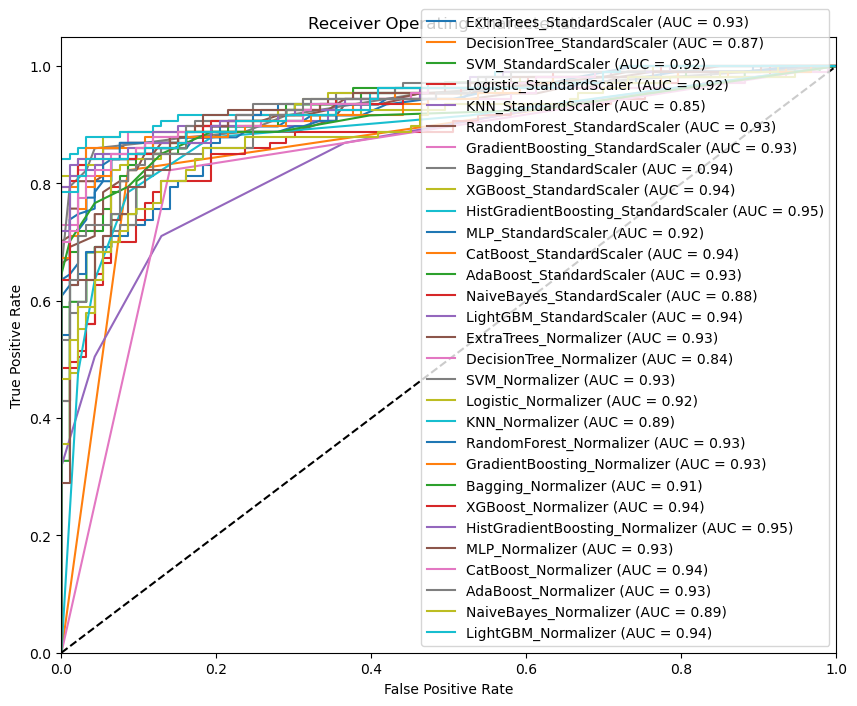

Results for RandomForest_StandardScaler:
Train Time: 0.96 seconds
Classification Report:
{'0': {'precision': 0.8461538461538461, 'recall': 0.946236559139785, 'f1-score': 0.8934010152284263, 'support': 93}, '1': {'precision': 0.9479166666666666, 'recall': 0.8504672897196262, 'f1-score': 0.8965517241379312, 'support': 107}, 'accuracy': 0.895, 'macro avg': {'precision': 0.8970352564102564, 'recall': 0.8983519244297056, 'f1-score': 0.8949763696831787, 'support': 200}, 'weighted avg': {'precision': 0.9005969551282051, 'recall': 0.895, 'f1-score': 0.8950866444950114, 'support': 200}}
Confusion Matrix:
[[88  5]
 [16 91]]
ROC AUC: 0.93
Optimal Threshold: 0.47


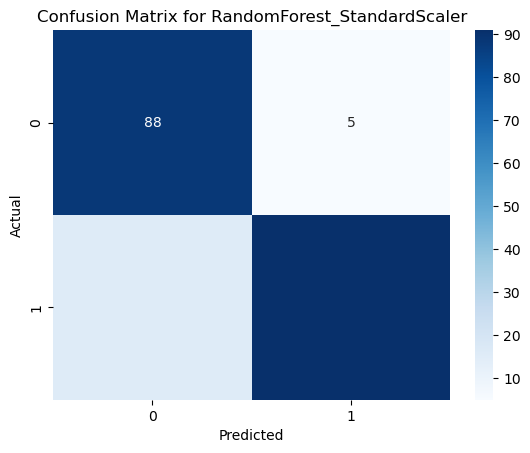

In [7]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, GridSearchCV
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

# List of models to use
models = {
    "ExtraTrees": ExtraTreesClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Logistic": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "Bagging": BaggingClassifier(),
    "XGBoost": XGBClassifier(),
    "HistGradientBoosting": HistGradientBoostingClassifier(),
    "MLP": MLPClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "AdaBoost": AdaBoostClassifier(),
    "NaiveBayes": GaussianNB(),
    "LightGBM": LGBMClassifier()
}

# Load your data
df = pd.read_csv(r"D:\Mehek\bodyfat.csv")
X = df.drop(['Density'], axis=1)
y = df['Density']

# For demonstration, we'll generate synthetic data
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize and Standardize the data
scalers = {
    'StandardScaler': StandardScaler(),
    'Normalizer': Normalizer()
}

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train model and measure time
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start

    # Predict on test data
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Evaluation metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Find the optimal threshold
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]

    return {
        "train_time": train_time,
        "classification_report": report,
        "confusion_matrix": conf_matrix,
        "roc_auc": roc_auc,
        "fpr": fpr,
        "tpr": tpr,
        "optimal_threshold": optimal_threshold
    }

results = {}

# Train and evaluate models on both normalized and standardized data
for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for model_name, model in models.items():
        print(f"Training {model_name} with {scaler_name}...")
        model_result = evaluate_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
        results[f"{model_name}_{scaler_name}"] = model_result

# Plot ROC Curve
plt.figure(figsize=(10, 8))
for key, result in results.items():
    plt.plot(result["fpr"], result["tpr"], label=f"{key} (AUC = {result['roc_auc']:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Example: Print the results for a specific model and scaler
model_to_check = "RandomForest_StandardScaler"
print(f"Results for {model_to_check}:")
print(f"Train Time: {results[model_to_check]['train_time']:.2f} seconds")
print("Classification Report:")
print(results[model_to_check]['classification_report'])
print("Confusion Matrix:")
print(results[model_to_check]['confusion_matrix'])
print(f"ROC AUC: {results[model_to_check]['roc_auc']:.2f}")
print(f"Optimal Threshold: {results[model_to_check]['optimal_threshold']:.2f}")

# Plot Confusion Matrix for a specific model
conf_matrix = results[model_to_check]['confusion_matrix']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for {model_to_check}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
